In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, RFE, f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.externals import joblib
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',10000)
df = pd.read_csv('/Users/mattlee/GA-Capstone-Project/FEdf1.csv')
df.head()

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,...,PERVORP,TotalWV,MPG3,FTMSR,3PMSR,ORBSR,DRBL,APGCR,SPGSR,TOVSR,Age at Draft SR,Height Inches C,TotalWSSR,TotalPCAWSSR,TotalPERWSSR,TotalWSBPMSR,TotalWSBPMVCR,PERVORPCR,Games Played 4,TotalOff,FTASR,FT%C,3PASR,3P%R,RPGSR
0,A.J. Price,UConn,12.466667,33.000000,29.30,4.166667,10.10,0.410667,2.633333,3.600000,0.719000,1.50,4.166667,0.348,0.800,2.433333,3.233333,4.566667,1.066667,0.066667,2.300000,1.300000,2009.0,IND,University of Connecticut,...,0.532868,0.739942,25153.757000,1.622755,1.224745,0.894427,0.889262,1.659077,1.032796,1.516575,506.25,405224.0,1.074640,NaN,0.692077,0.788659,0.912516,0.810724,1.185921e+06,1.731432,1.897367,0.371695,2.041241,1.000053,1.798147
1,Aaron Gray,PITT,8.750000,28.250000,18.40,3.425000,6.25,0.554250,1.900000,3.175000,0.590500,0.00,0.000000,0.000,2.275,3.975000,6.275000,1.175000,0.300000,1.025000,1.350000,1.975000,2007.0,CHI,University of Pittsburgh,...,0.592658,0.758726,6229.504000,1.378405,0.000000,1.508310,1.380025,1.055227,0.547723,1.161895,497.29,614125.0,1.141701,NaN,0.736290,0.843103,0.951634,0.839978,6.369038e+05,2.684290,1.781853,0.205902,0.000000,inf,2.504995
2,Al Horford,UF,9.866667,36.333333,25.50,3.766667,6.40,0.565333,2.433333,3.966667,0.612333,0.00,0.066667,0.000,2.300,5.500000,7.766667,1.633333,0.833333,1.700000,1.533333,2.433333,2007.0,ATL,University of Florida,...,1.070043,0.989856,16581.375000,1.559915,0.000000,1.516575,1.704748,1.177674,0.912871,1.238278,432.64,551368.0,1.544184,0.641559,1.092341,1.146499,1.200006,1.022823,1.742693e+06,2.954779,1.991649,0.229596,0.258199,inf,2.786874
3,Al-Farouq Aminu,WF,13.300000,31.000000,30.15,4.650000,9.80,0.481500,3.600000,5.200000,0.684500,0.40,1.550000,0.226,3.050,5.650000,8.700000,1.300000,1.150000,1.250000,2.650000,2.550000,2010.0,LAC,Wake Forest University,...,0.641763,0.837860,27407.028375,1.897367,0.632456,1.746425,1.731656,1.091393,1.072381,1.627882,380.25,512000.0,1.218966,NaN,0.782726,0.918758,1.021253,0.862564,9.235210e+05,2.034810,2.280351,0.320716,1.244990,1.000074,2.949576
4,Alec Burks,UCOL,18.450000,34.000000,30.80,6.100000,12.20,0.503000,5.650000,7.100000,0.798500,0.65,2.150000,0.322,2.100,3.500000,5.650000,2.300000,1.150000,0.350000,2.200000,2.350000,2011.0,UTA,University of Colorado,...,0.626673,0.786119,29218.112000,2.376973,0.806226,1.449138,1.252763,1.320006,1.072381,1.483240,388.09,474552.0,1.163819,NaN,0.793285,0.853113,0.957048,0.855750,1.336336e+06,2.392888,2.664583,0.509125,1.466288,1.000057,2.376973


**Feature Selection**

In [3]:
def skb(x,y,features):
    kbest = SelectKBest(score_func= mutual_info_regression,k = features)
    kbest_columns = kbest.fit_transform(x,y)
    mask = kbest.get_support() #list of booleans
    new_features = [] # The list of your K best features
    for bool, feature in zip(mask, x.columns):
        if bool:
            new_features.append(feature)
    dfkbest = pd.DataFrame(kbest_columns, columns = new_features)
    scores = zip(x.columns,list(kbest.scores_))
    return dfkbest, scores
#made a function that can manually iterate number of desired KBest features

In [4]:
df.columns

Index([u'Name', u'Team', u'PPG', u'Games Played', u'MPG', u'FGM', u'FGA',
       u'FG%', u'FTM', u'FTA', u'FT%', u'3PM', u'3PA', u'3P%', u'ORB', u'DRB',
       u'RPG', u'APG', u'SPG', u'BPG', u'TOV', u'PF', u'Year', u'NBATeam',
       u'CollegeName', u'Age at Draft', u'Weight at Draft', u'Height Inches',
       u'PER', u'WS', u'WS/48', u'BPM', u'VORP', u'TopSchool', u'Total',
       u'TotalWS', u'TotalWS48', u'TotalPCAWS', u'TotalPCAWS48', u'TotalDef',
       u'TotalPERWS', u'TotalPERWSBPM', u'TotalWSBPM', u'TotalWSBPMV',
       u'PERVORP', u'TotalWV', u'MPG3', u'FTMSR', u'3PMSR', u'ORBSR', u'DRBL',
       u'APGCR', u'SPGSR', u'TOVSR', u'Age at Draft SR', u'Height Inches C',
       u'TotalWSSR', u'TotalPCAWSSR', u'TotalPERWSSR', u'TotalWSBPMSR',
       u'TotalWSBPMVCR', u'PERVORPCR', u'Games Played 4', u'TotalOff',
       u'FTASR', u'FT%C', u'3PASR', u'3P%R', u'RPGSR'],
      dtype='object')

In [112]:
x = df[['PPG','Games Played 4','MPG3','FGM','FG%','FTMSR','FT%C','3PMSR','DRBL','APGCR','SPGSR','TOVSR','BPG',
       'PF','Age at Draft SR','Weight at Draft','Height Inches C','TopSchool']]
y = df['TotalDef']

In [116]:
dfkbest, scores = skb(x,y,15)

In [117]:
scores

[('PPG', 0.0),
 ('Games Played 4', 0.0),
 ('MPG3', 0.03217565636833708),
 ('FGM', 0.0),
 ('FG%', 0.19827705173200005),
 ('FTMSR', 0.0),
 ('FT%C', 0.14235284751923727),
 ('3PMSR', 0.2337520065789338),
 ('DRBL', 0.29812141790768543),
 ('APGCR', 0.097881264170796012),
 ('SPGSR', 0.054790707306582753),
 ('TOVSR', 0.06394795012891219),
 ('BPG', 0.26665758003370588),
 ('PF', 0.055971629271762247),
 ('Age at Draft SR', 0.12002733277186373),
 ('Weight at Draft', 0.26341840075514744),
 ('Height Inches C', 0.231276787797698),
 ('TopSchool', 0.0048543515654964065)]

In [118]:
dfkbest.columns

Index([u'MPG3', u'FG%', u'FTMSR', u'FT%C', u'3PMSR', u'DRBL', u'APGCR',
       u'SPGSR', u'TOVSR', u'BPG', u'PF', u'Age at Draft SR',
       u'Weight at Draft', u'Height Inches C', u'TopSchool'],
      dtype='object')

In [119]:
x = dfkbest

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.35)

In [147]:
ln = LinearRegression()

In [148]:
gsln = GridSearchCV(ln, param_grid={})

In [149]:
gsln.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [150]:
gsln.best_estimator_.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
gsln.best_estimator_.score(x_train,y_train)

0.67742963458372463

In [152]:
gsln.best_estimator_.score(x_test, y_test)

0.73386864853929179

In [176]:
zipped1 = zip(dfkbest.columns,gsln.best_estimator_.coef_)
zipped1.sort(key = lambda t: t[1], reverse = True)
zipped1

[('FG%', 1.0417905820515403),
 ('SPGSR', 0.49711166640011462),
 ('DRBL', 0.39227341055140463),
 ('APGCR', 0.31834309449880732),
 ('TopSchool', 0.1251764152631557),
 ('BPG', 0.031979150820973357),
 ('PF', 0.030647733190519916),
 ('Weight at Draft', 0.00085393325513349883),
 ('Height Inches C', 1.3222066632678775e-06),
 ('MPG3', -5.4125409380894275e-06),
 ('Age at Draft SR', -0.0012670226825561848),
 ('FT%C', -0.090585140170996545),
 ('TOVSR', -0.097537428585996511),
 ('FTMSR', -0.12612124034861691),
 ('3PMSR', -0.18364403168306168)]

In [166]:
joblib.dump(gsln.best_estimator_, 'Defense_LR.pkl')

['Defense_LR.pkl']

In [153]:
rg = RidgeCV(alphas = [0.001, 0.01, 0.1, 1.0, 10])

In [154]:
rg.fit(x_train,y_train)

RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 10], cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [155]:
rg.score(x_train,y_train)

0.67604194024924613

In [156]:
rg.score(x_test,y_test)

0.73611438637108773

In [175]:
zipped = zip(dfkbest.columns,rg.coef_)
zipped.sort(key = lambda t: t[1], reverse = True)
zipped

[('FG%', 0.65277711044430031),
 ('SPGSR', 0.49187190186169816),
 ('DRBL', 0.3901921742293708),
 ('APGCR', 0.3045845010438597),
 ('TopSchool', 0.12711166526712603),
 ('PF', 0.035210125151737159),
 ('BPG', 0.034565280209655214),
 ('Weight at Draft', 0.00089958904813158824),
 ('Height Inches C', 1.3523967936635017e-06),
 ('MPG3', -5.3905387176200747e-06),
 ('Age at Draft SR', -0.001265223049585984),
 ('FT%C', -0.080574681843052165),
 ('TOVSR', -0.097183727878772386),
 ('FTMSR', -0.11815561944027309),
 ('3PMSR', -0.20521934974035894)]

In [167]:
joblib.dump(rg, 'Defense_Ridge.pkl')

['Defense_Ridge.pkl']

In [157]:
gb = GradientBoostingRegressor()

In [158]:
params = {'learning_rate':[0.001,0.01,0.1,0.2,0.3],
         'n_estimators':[100,500],
         'max_depth':[1,20,25],
         'min_samples_split':[3,4,5],
         'min_samples_leaf':[3,4,5],
         'max_features':['sqrt']}

In [159]:
gsgb = GridSearchCV(gb,params,n_jobs=-1)

In [160]:
gsgb.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3], 'min_samples_leaf': [3, 4, 5], 'n_estimators': [100, 500], 'max_features': ['sqrt'], 'min_samples_split': [3, 4, 5], 'max_depth': [1, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [161]:
gsgb.best_estimator_.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=1,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=3,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [162]:
gsgb.best_estimator_.score(x_train,y_train)

0.8144571929083616

In [163]:
gsgb.best_estimator_.score(x_test, y_test)

0.60780483066675695

In [168]:
joblib.dump(gsgb.best_estimator_, 'Defense_GBR.pkl')

['Defense_GBR.pkl']

In [164]:
lass = LassoCV(alphas = [0.001, 0.01, 0.1, 1.0, 10])
lass.fit(x_train, y_train)
lass.score(x_train, y_train)
lass.score(x_test, y_test)

0.72926911741379941

In [177]:
zipped2 = zip(dfkbest.columns,lass.coef_)
zipped2.sort(key = lambda t: t[1], reverse = True)
zipped2

[('SPGSR', 0.49273330332440973),
 ('DRBL', 0.37923425952823564),
 ('APGCR', 0.22187565630040668),
 ('FG%', 0.17867321164066505),
 ('TopSchool', 0.12576951812557438),
 ('BPG', 0.036124062527893366),
 ('PF', 0.026555367462522111),
 ('Weight at Draft', 0.0011588346413914405),
 ('Height Inches C', 1.2557528112274954e-06),
 ('FT%C', -0.0),
 ('TOVSR', -0.0),
 ('MPG3', -5.7775437575430874e-06),
 ('Age at Draft SR', -0.0012264637422481066),
 ('FTMSR', -0.12204284791594916),
 ('3PMSR', -0.23599256825593579)]

In [180]:
lasspredict = (lass.predict(x_test))
pre = pd.DataFrame(lasspredict, columns = ['Predictions'])
forpredf = pd.DataFrame(y_test).reset_index(drop = True)
pre1 = pre.merge(forpredf, left_index=True, right_index=True)
pre1.head()

,Predictions,TotalDef
0,1.314487,1.167864
1,0.756653,0.900125
2,1.080901,1.280863
3,1.801870,2.397835
4,1.498183,1.198795


In [181]:
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasspredict))

RMSE: 0.208997098269


In [184]:
lass.alpha_

0.001

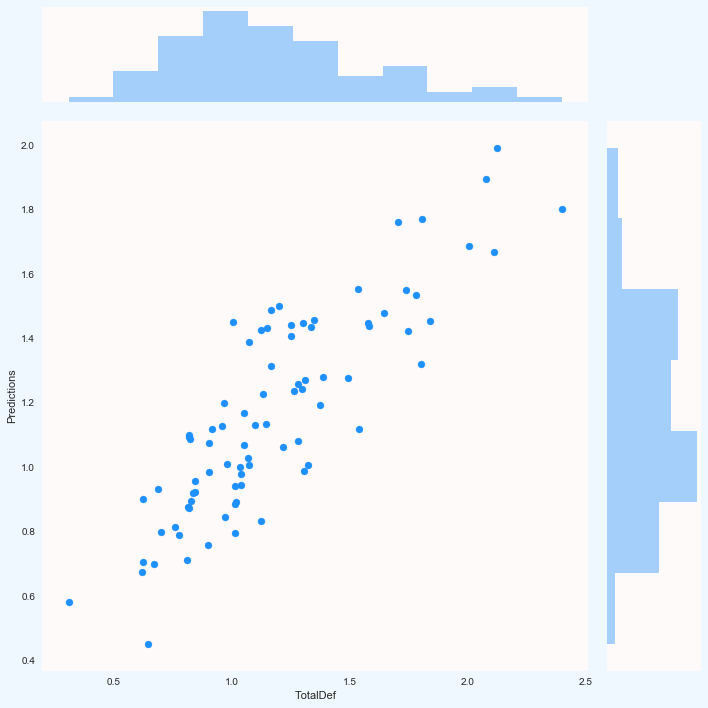

In [186]:
sns.set(rc={'axes.facecolor':'snow', 'figure.facecolor':'aliceblue','axes.grid':False})

sns.jointplot(x = 'TotalDef', y = 'Predictions', data = pre1, kind = 'scatter', 
              color = 'dodgerblue', stat_func = None, size = 10)

In [183]:
coef = pd.DataFrame(lass.coef_,dfkbest.columns, columns = ['Coefficients'])
coef.sort_values(by = 'Coefficients', ascending = False)

,Coefficients
SPGSR,0.492733
DRBL,0.379234
APGCR,0.221876
FG%,0.178673
TopSchool,0.125770
BPG,0.036124
PF,0.026555
Weight at Draft,0.001159
Height Inches C,0.000001
FT%C,-0.000000


In [169]:
joblib.dump(lass, 'Defense_LS.pkl')

['Defense_LS.pkl']

Below is just scrap work, please ignore
==

In [115]:
lr = RidgeCV(alphas = [0.001,0.01,0.1,1.0])
score_dict = {}
for rng in range(1,18):
    dfkbest, scores = skb(x,y,rng)
    x_train, x_test, y_train, y_test = train_test_split(dfkbest, y,
                                                   test_size=0.35)
    modellr = lr.fit(x_train, y_train)
    score_dict[rng] = (modellr.score(x_train, y_train),modellr.score(x_test, y_test))
dfkbest, scores = skb(x,y,'all')
x_train, x_test, y_train, y_test = train_test_split(dfkbest, y,
                                                   test_size=0.35)
modellr = lr.fit(x_train, y_train)
score_dict['all'] = (modellr.score(x_train, y_train),modellr.score(x_test, y_test))
score_dict
#test out scores on how many features used

{1: (0.32658007510830345, 0.42996707670300521),
 2: (0.41560853859881963, 0.45176568795184002),
 3: (0.48576344547781419, 0.46206334265528443),
 4: (0.49944401484185136, 0.59497170298003721),
 5: (0.58743936000910923, 0.44845002077100571),
 6: (0.50833283200501522, 0.6090444441398557),
 7: (0.57616823232268644, 0.51735314051071113),
 8: (0.58962103693944412, 0.55880514882196874),
 9: (0.61368642565962706, 0.59211194911470055),
 10: (0.58245210970277772, 0.61474753585642761),
 11: (0.63789567627667176, 0.62249254141825583),
 12: (0.65097982138993071, 0.65252622909797342),
 13: (0.73579155896738402, 0.55695380169886199),
 14: (0.69363259280894252, 0.66314194927068493),
 15: (0.68875901199614264, 0.70887480312896334),
 16: (0.71847240276192847, 0.63838243928340987),
 17: (0.69684932660824228, 0.69552861035588742),
 'all': (0.73954590674721754, 0.52426602111529053)}